# Ejercicio/Tarea 4

### Rafael Martínez Martínez

__Utilizar lo que hemos visto hasta ahora de Julia para:__

1. Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raiz.

2. Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones:
    * Que tome como argumentos tanto a la función, su derivada y la condición inicial.
    * Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un intervalo, por ejemplo costruido con `linspace`, recordando que hay que llamar a las funciones con un punto `f.(x)`.
    * Combinar las dos formas en una sola rutina, aqui será necesario poner un condicional `if` que verifique de que tipo es el _input_.
    * Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los _inputs_ de la función del método sea solamente la función y la condición (o intervalo) inicial.
        * Para esto deberán usar lo que aprendimos de SymPy y como podemos convertir y/o evaluar funciones tanto en simbolos como en flotantes.
        
__Nota:__ Se resolveran dudas de esta tarea el Jueves 24, así que traten de avanzar para que surjan dudas.

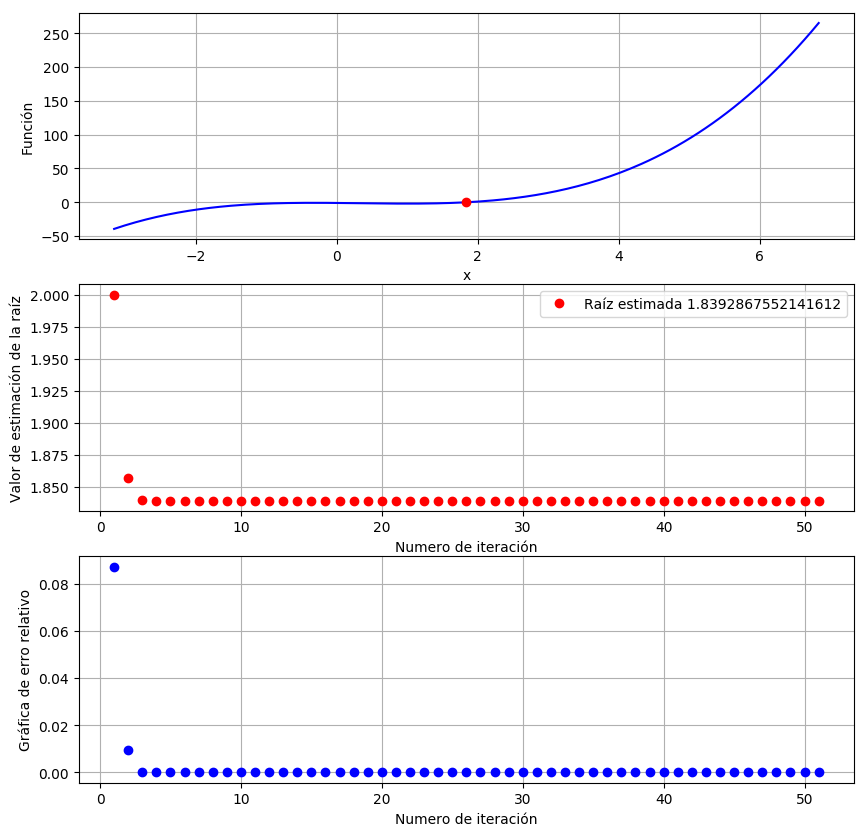

1.8392867552141612

In [54]:
using SymPy
using PyPlot
x=Sym("x")


"""
Esta funcion recibe dos argumentos la función f a encontrar su raíz y 
la condicion inicial x0, regresa la raíz estimada si el método tuvo exito

f-> es simbolica dependiente de la variable x 

ci-> condición inicial puede ser un intervalo o un punto

r-> regresa la raíz estimada

"""
function Newton(f,ci)
    
    
    if typeof(2)==typeof(ci) || typeof(2.0)==typeof(ci)
        x0=ci
    
    else
        x0=(ci[1]+ci[2])/2
    end
    
    fp=simplify(diff(f,x))
    r=Float64[]
    push!(r, x0)
    fn=lambdify(f,[x]);
    fpn=lambdify(fp,[x]);
    cont=1
    while abs(fn(x0))>0.000001 || cont<=50
        if fpn(x0)!=0
            x0=x0-(fn(x0)/fpn(x0))
            push!(r, x0)
        else
            println("El metodo no funciona")
        end
        cont=cont+1
    end
    
    
    # Graficamos la funcion original
    fig= figure("pyplot_majorminor",figsize=(10,10))
    ix=linspace(r[end]-5,r[end]+5,200)
    subplot(311)
    plot(ix,f.(ix),"b",r[end],f(r[end]),"ro")
    grid("on")
    xlabel("x")
    ylabel("Función")
   
    
    # Graficamos la susión de puntos
    raize=r[end]
    n=1:length(r)
    subplot(312)
    plot(n,r,"ro",label="Raíz estimada $raize")
    grid("on")
    xlabel("Numero de iteración")
    ylabel("Valor de estimación de la raíz")
    legend(loc="upper right",fancybox="true") 
    
    # Graficamos el error relativo
    n=1:length(r)
    subplot(313)
    plot(n,(r-raize)/raize,"bo")
    grid("on")
    xlabel("Numero de iteración")
    ylabel("Gráfica de error relativo")
    legend(loc="upper right",fancybox="true") 

    
    
    return r[end]
end

f=x^3 - x^2 - x - 1;
a=Newton(f,2)
a

In [11]:

type(2)

LoadError: [91msyntax: incomplete: premature end of input[39m

In [33]:
a=[1,2]

2-element Array{Int64,1}:
 1
 2

In [34]:
a-2

2-element Array{Int64,1}:
 -1
  0

In [35]:
a/2

2-element Array{Float64,1}:
 0.5
 1.0